
QUESTION 2(b) v.:


<Figure size 1000x600 with 0 Axes>

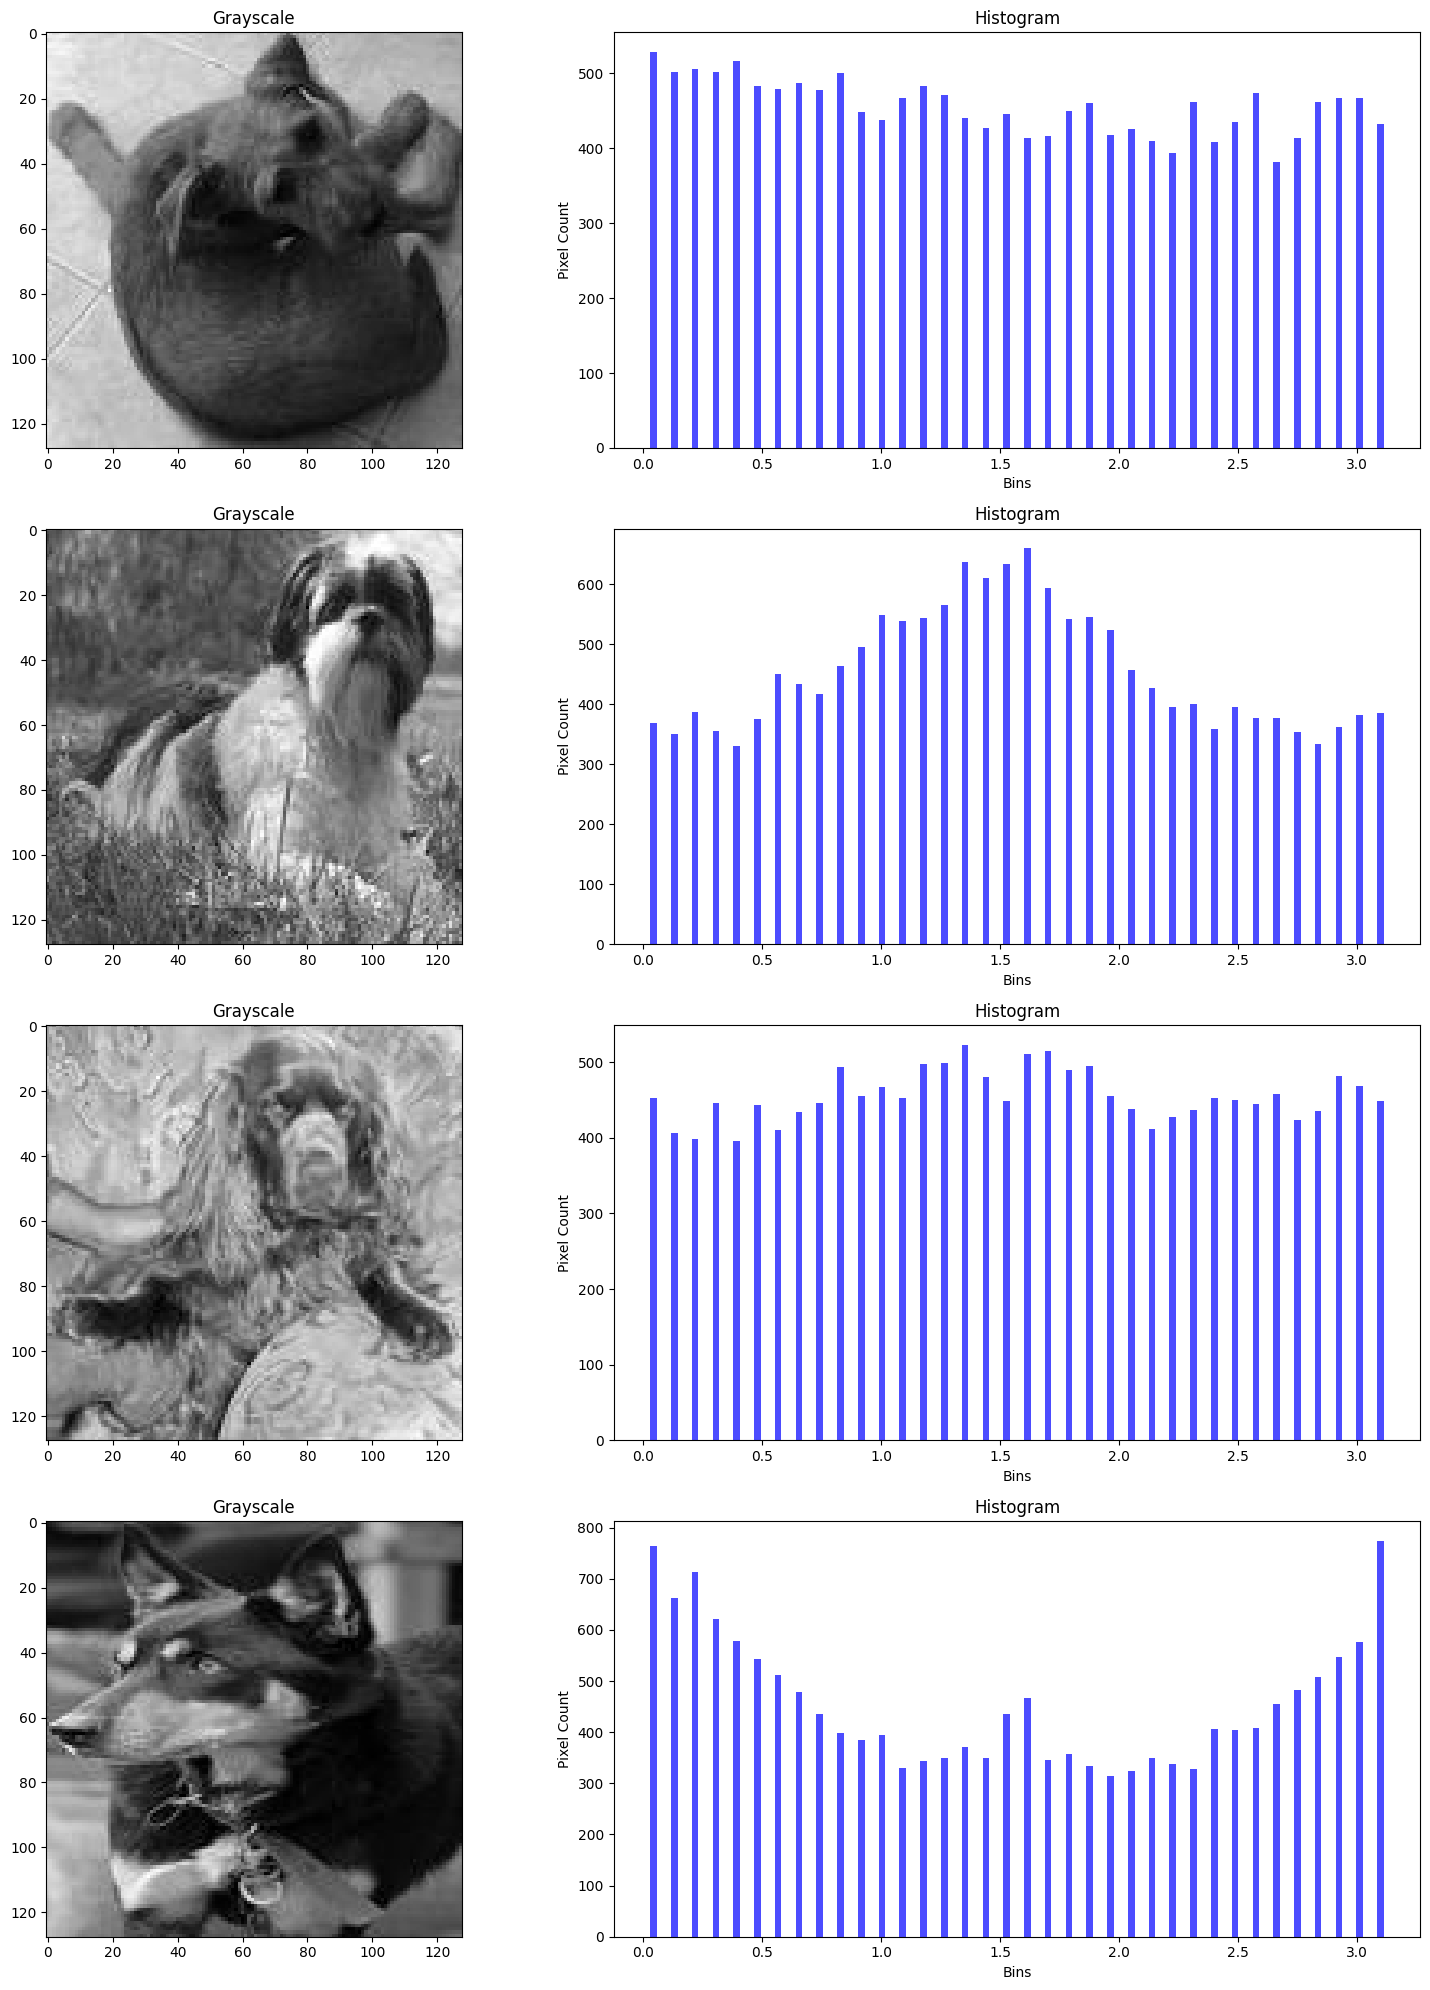

QUESTION 2(b) vi.:
Manhattan distance between 1st and 2nd image: [[3436.]] 
Euclidean: [[675.99556212]] 
and Cosine: [[0.02968716]]


QUESTION 2(c):


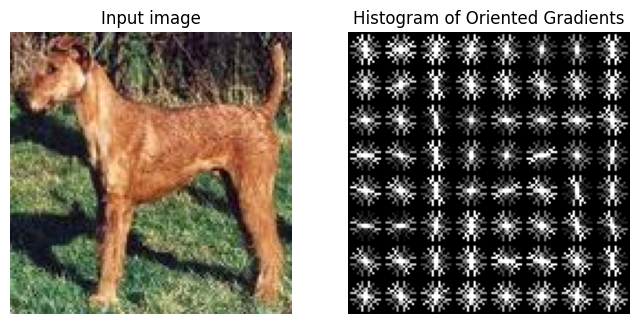


Question 2(d) iv.: None of the classes are separate, they are all overlapping:


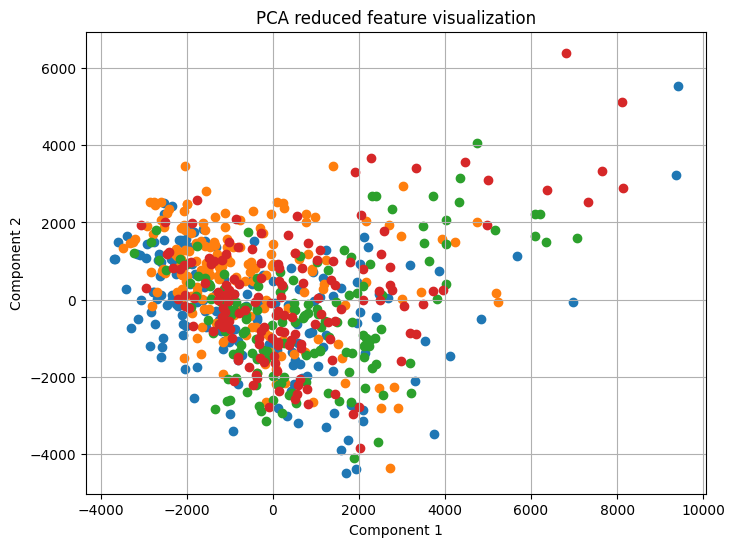

In [5]:
#SCOTT KALAFUT, DATA MINING I, PROGRAMMING ASSIGNMENT 1
#DISCUSSED QUESTIONS WITH MILES
#for question 2b:
import numpy as np
import skimage.exposure
from skimage import data
from skimage.color import rgb2gray
from skimage import filters
from skimage import io
import random
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances

import skimage as ski

#for question 2a:
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
from PIL import Image
from pathlib import Path
import glob

#for question 2c:
from skimage.feature import hog
from skimage import data, exposure

#for question 2d:
from sklearn import datasets, decomposition
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors


#for question 4:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import json


def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin, ymin, xmax, ymax))
    return bbox

def get_image(annot):
    base_path = './stanford-dogs-dataset/images'
    img_path = os.path.join(base_path, 'Images')

    # Normalize the annotation path and split it
    annot_parts = os.path.normpath(annot).split(os.sep)

    # Extract the breed folder and image name
    breed_folder = annot_parts[-2]
    image_name = os.path.splitext(annot_parts[-1])[0]  # Remove the extension

    # Construct the image filename
    img_filename = os.path.join(img_path, breed_folder, f"{image_name}.jpg")

    return img_filename

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

def get_one_image(path, ending):
    all_files = os.listdir(path)
    matching_files = [file for file in all_files if file.endswith('-' + ending)]
    return os.path.join(path, random.choice(matching_files))

if __name__ == '__main__':
    dog_images = glob.glob('./stanford-dogs-dataset/images/Images/*/*')
    breeds = glob.glob('./stanford-dogs-dataset/annotations/Annotation/*')
    annotations = glob.glob('./stanford-dogs-dataset/annotations/Annotation/*/*')
    cropped = "./Cropped/"
    img_size = 299  # For Xception input
    train_dir = './Cropped'  # './Images'
    batch_size_training = 256
    batch_size_validation = 256
    input_shape = (img_size, img_size, 3)

    plt.figure(figsize=(10, 6))

    #2a.
    for i in range(len(annotations)):
        bbox = get_bounding_boxes(annotations[i])
        dog = get_image(annotations[i])
        im = Image.open(dog)
        for j in range(len(bbox)):
            im2 = im.crop(bbox[j])
            im2 = im2.resize((128, 128), Image.Resampling.LANCZOS)
            new_path = dog.replace('./stanford-dogs-dataset/images/Images/', './Cropped/')
            new_path = new_path.replace('.jpg', '-' + str(j) + '.jpg')
            im2 = im2.convert('RGB')
            head, tail = os.path.split(new_path)
            Path(head).mkdir(parents=True, exist_ok=True)
            im2.save(new_path)

    #print(len(dog_images), len(breeds), len(annotations), len(bbox))

    #2b.i.
    image1 = io.imread(get_one_image('./stanford-dogs-dataset/images/Images/n02093991-Irish_terrier', '0.jpg'))
    image2 = io.imread(get_one_image('./stanford-dogs-dataset/images/Images/n02098413-Lhasa', '0.jpg'))
    image3 = io.imread(get_one_image('./stanford-dogs-dataset/images/Images/n02102480-Sussex_spaniel', '0.jpg'))
    image4 = io.imread(get_one_image('./stanford-dogs-dataset/images/Images/n02105412-kelpie', '0.jpg'))

    #2b.ii.
    grayscale1 = rgb2gray(image1)
    grayscale2 = rgb2gray(image2)
    grayscale3 = rgb2gray(image3)
    grayscale4 = rgb2gray(image4)

    fig, axes = plt.subplots(4, 2, figsize=(16, 20))
    ax = axes.ravel()

    #2b.iii.
    angle_sobel1 = angle(filters.sobel_h(grayscale1), filters.sobel_v(grayscale1))
    angle_sobel2 = angle(filters.sobel_h(grayscale2), filters.sobel_v(grayscale2))
    angle_sobel3 = angle(filters.sobel_h(grayscale3), filters.sobel_v(grayscale3))
    angle_sobel4 = angle(filters.sobel_h(grayscale4), filters.sobel_v(grayscale4))

    #print(angle_sobel1)

    #2b.iv.
    hist1, bin_centers1 = skimage.exposure.histogram(angle_sobel1, 36)
    hist2, bin_centers2 = skimage.exposure.histogram(angle_sobel2, 36)
    hist3, bin_centers3 = skimage.exposure.histogram(angle_sobel3, 36)
    hist4, bin_centers4 = skimage.exposure.histogram(angle_sobel4, 36)

    #2b.v.
    ax[0].imshow(grayscale1, cmap=plt.cm.gray)
    ax[0].set_title("Grayscale")
    ax[1].bar(bin_centers1, hist1, width=1/36, align='center', color='b', alpha=0.7)
    ax[1].set_title("Histogram")
    ax[1].set_xlabel("Bins")
    ax[1].set_ylabel("Pixel Count")

    ax[2].imshow(grayscale2, cmap=plt.cm.gray)
    ax[2].set_title("Grayscale")
    ax[3].bar(bin_centers2, hist2, width=1/36, align='center', color='b', alpha=0.7)
    ax[3].set_title("Histogram")
    ax[3].set_xlabel("Bins")
    ax[3].set_ylabel("Pixel Count")

    ax[4].imshow(grayscale3, cmap=plt.cm.gray)
    ax[4].set_title("Grayscale")
    ax[5].bar(bin_centers3, hist3, width=1/36, align='center', color='b', alpha=0.7)
    ax[5].set_title("Histogram")
    ax[5].set_xlabel("Bins")
    ax[5].set_ylabel("Pixel Count")

    ax[6].imshow(grayscale4, cmap=plt.cm.gray)
    ax[6].set_title("Grayscale")
    ax[7].bar(bin_centers4, hist4, width=1/36, align='center', color='b', alpha=0.7)
    ax[7].set_title("Histogram")
    ax[7].set_xlabel("Bins")
    ax[7].set_ylabel("Pixel Count")

    fig.tight_layout()
    print('\nQUESTION 2(b) v.:')
    plt.show()

    #2b.vi
    hist1 = np.array(hist1).reshape(1,-1)
    hist2 = np.array(hist2).reshape(1,-1)
    manhattan_12 = manhattan_distances(hist1, hist2)
    euclidean_12 = euclidean_distances(hist1, hist2)
    cosine_12 = cosine_distances(hist1, hist2)
    print("QUESTION 2(b) vi.:\nManhattan distance between 1st and 2nd image:", manhattan_12, "\nEuclidean:", euclidean_12, "\nand Cosine:", cosine_12)
    
    #2c.
    hogimage1 = io.imread(get_one_image('./stanford-dogs-dataset/images/Images/n02093991-Irish_terrier', '0.jpg'))
    #print(hogimage1.shape)
    fd, hog_image = hog(hogimage1, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, channel_axis=-1)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(hogimage1, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))
    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    print('\n\nQUESTION 2(c):')
    plt.show()
    
    #2d.
    image_paths = glob.glob('./stanford-dogs-dataset/images/Images/*/*')
    histograms = []
    breed_labels = []
    histograms_by_breed = {}
    colors = list(mcolors.TABLEAU_COLORS.values())

    for image_path in image_paths:
        if image_path.endswith("-0.jpg"):#, ".png", ".jpeg")) and not image_path.endswith("-0.jpg"):
            pcaimage_path = io.imread(image_path)
            #grayscale = rgb2gray(pcaimage_path)
            breed = os.path.basename(os.path.dirname(image_path))
            breed_labels.append(breed)
            #angle_sobel = angle(filters.sobel_h(grayscale), filters.sobel_v(grayscale))
            #hist, bin_center = skimage.exposure.histogram(angle_sobel, 36)

            hist_r, _ = np.histogram(pcaimage_path[:, :, 0], bins=36, range=(0, 256))
            hist_g, _ = np.histogram(pcaimage_path[:, :, 1], bins=36, range=(0, 256))
            hist_b, _ = np.histogram(pcaimage_path[:, :, 2], bins=36, range=(0, 256))
            
            hist_combined = np.concatenate([hist_r, hist_g, hist_b])
            histograms.append(hist_combined)

            if breed not in histograms_by_breed:
                histograms_by_breed[breed] = []
                
            histograms_by_breed[breed].append(hist_combined)

    breed_labels = np.array(breed_labels)
    unique_breeds = np.unique(breed_labels)
    histograms_array = np.array(histograms)
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(histograms_array)
    
    unique_breeds = np.unique(breed_labels)
    color_map = {breed: colors[i % len(colors)] for i, breed in enumerate(unique_breeds)}

    # for breed in histograms_by_breed:
        # print(f"{breed}: {len(histograms_by_breed[breed])} histograms collected.") USED FOR TESTING

    plt.figure(figsize=(8,6))
    for breed in unique_breeds:
        indices = np.where(breed_labels == breed)
        plt.scatter(pca_data[indices, 0], pca_data[indices, 1], label=breed, color=color_map[breed])
        
    plt.title('PCA reduced feature visualization')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid()
    print('\nQuestion 2(d) iv.: None of the classes are separate, they are all overlapping:')
    plt.show()



In [3]:
    #4
    #feature counts and tf-idf feature counts
    def extract_tweet(json_obj):
        return json_obj["Tweet"]
    
    tweets = []

    with open('./student_14/train.json', 'r') as file:
        for line in file:
            json_obj = json.loads(line.strip())
            tweets.append(extract_tweet(json_obj))

    #4(1)
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(tweets)
    vectorizer.get_feature_names_out()
    print('QUESTION 4 PART 1: The dimensionality of the count vector is ', X.shape)
    #print(X) (USED FOR TESTING)

    #4(2)
    tfidf_vectorizer = TfidfVectorizer()
    Y = tfidf_vectorizer.fit_transform(tweets)
    tfidf_vectorizer.get_feature_names_out()
    print('QUESTION 4 PART 2: The dimensionality of the tf-idf vector is ', Y.shape)
    # print(Y) (ISED FOR TESTING)


QUESTION 4 PART 1: The dimensionality of the count vector is  (3000, 9517)
QUESTION 4 PART 2: The dimensionality of the tf-idf vector is  (3000, 9517)


QUESTION 5:


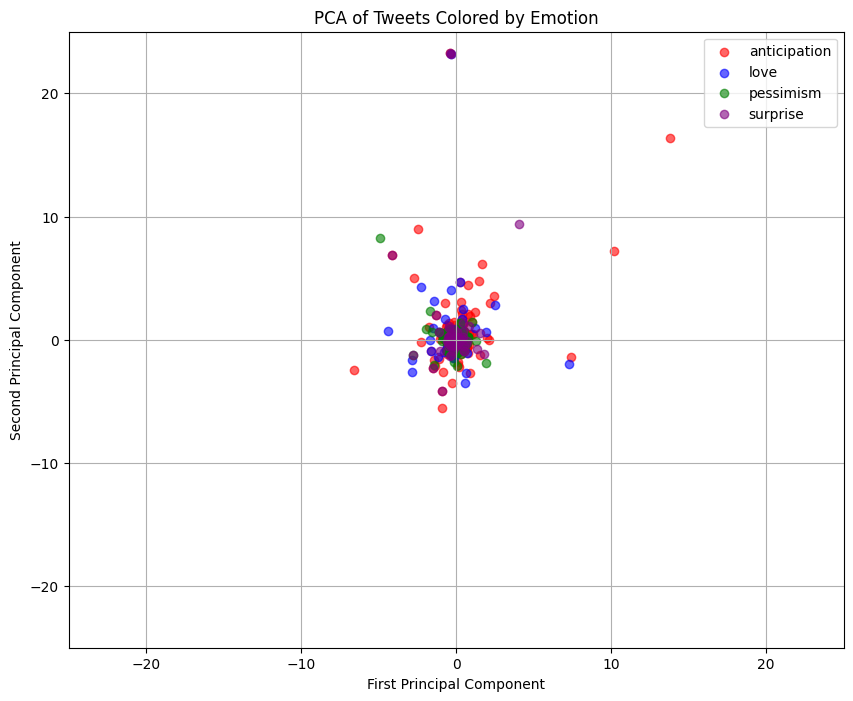

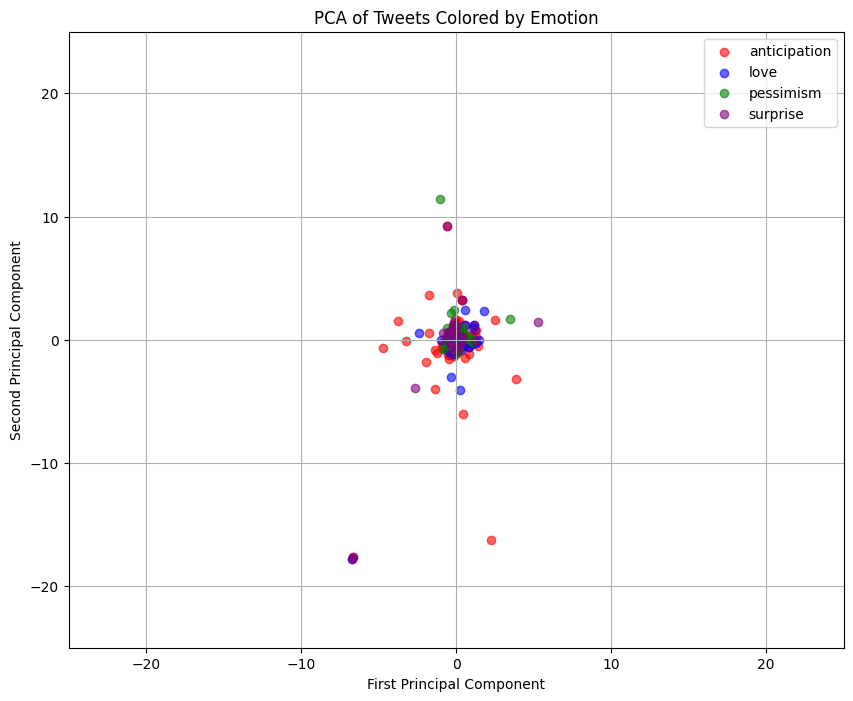


I would have expected the categories to be more separated, but clearly given the methods used, it did not provide any separation.  They are all overlapping.


In [4]:
    #5:
    #Four classes that would be separable: anticipation, love, pessimism and surprise
    #compare_features = ['anticipation', 'love', 'pessimism', 'suprise']
    from sklearn.preprocessing import StandardScaler

    def load_data(file_path):
        tweets = []
        emotions = []
        with open(file_path, 'r') as file:
            for line in file:
                data = json.loads(line)
                tweets.append(data['Tweet'])
                emotions.append([data[emotion] for emotion in selected_emotions])
        return tweets, np.array(emotions)

    selected_emotions = ['anticipation', 'love', 'pessimism', 'surprise']

    file_path = './student_14/train.json'  # Replace with your file path
    tweets, emotion_labels = load_data(file_path)

    #COUNT VECTOR
    scaler = StandardScaler(with_mean=False)
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled.toarray())

    colors = ['red', 'blue', 'green', 'purple']
    color_map = {emotion: color for emotion, color in zip(selected_emotions, colors)}

    print('QUESTION 5:')

    plt.figure(figsize=(10, 8))

    for i, emotion in enumerate(selected_emotions):
        # Get indices where this emotion is True
        indices = np.where(emotion_labels[:, i])[0]
        plt.scatter(X_pca[indices, 0], X_pca[indices, 1], c=color_map[emotion], label=emotion, alpha=0.6)

    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of Tweets Colored by Emotion')
    plt.legend()
    plt.grid(True)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.show()


    #TFIDF VECTOR
    scaler = StandardScaler(with_mean=False)
    Y_scaled = scaler.fit_transform(Y)

    pca = PCA(n_components=2)
    Y_pca = pca.fit_transform(Y_scaled.toarray())

    colors = ['red', 'blue', 'green', 'purple']
    color_map = {emotion: color for emotion, color in zip(selected_emotions, colors)}

    plt.figure(figsize=(10, 8))

    for i, emotion in enumerate(selected_emotions):
        # Get indices where this emotion is True
        indices = np.where(emotion_labels[:, i])[0]
        plt.scatter(Y_pca[indices, 0], Y_pca[indices, 1], c=color_map[emotion], label=emotion, alpha=0.6)

    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of Tweets Colored by Emotion')
    plt.legend()
    plt.grid(True)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.show()

    print('\nI would have expected the categories to be more separated, but clearly given the methods used, it did not provide any separation.  They are all overlapping.')

